In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
]

Kernel = ["linear"]

#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(10,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                    facecolors='none', zorder=10, edgecolors='white')
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                	#为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )

plt.tight_layout()
plt.show()

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 1000x1600 with 8 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

In [4]:
class_1 = 500 #类别1有500个样本，10：1
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [5]:
X.shape

(550, 2)

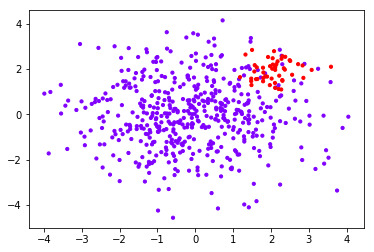

In [6]:
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
plt.show()
#其中红色点是少数类，紫色点是多数类

In [7]:
#不设定class_weight
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
#设定class_weight
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
#给两个模型分别打分看看，这个分数是accuracy准确度
#做样本均衡之后，我们的准确率下降了，没有样本均衡的准确率更高
clf.score(X,y)

wclf.score(X,y)

0.9127272727272727

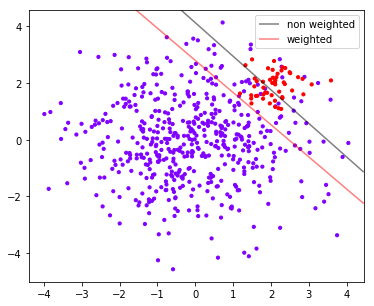

In [10]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])

#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [11]:
a.collections #调用这个等高线对象中画的所有线，返回一个惰性对象

<a list of 1 mcoll.LineCollection objects>

In [12]:
#用[*]把它打开试试看
[*a.collections] #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表

In [13]:
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]

In [14]:
#plt.legend([对象列表],[图例列表],loc)
#只要对象列表和图例列表相对应，就可以显示出图例

In [15]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.7142857142857143

In [16]:
(y[y == clf.predict(X)] == 1).sum() #True = 1, False =1 #真实值等于预测值的全部点

30

In [17]:
int(False)

0

In [18]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5102040816326531

In [19]:
#所有predict为1的点 / 全部为1的点的比例
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(y == 1).sum()

0.6

In [20]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum()

1.0

In [21]:
#所有被正确预测为0的样本 / 所有的0样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 0).sum()/(y == 0).sum()

0.976

In [22]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 0).sum()/(y == 0).sum()

0.904

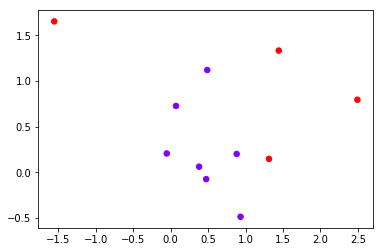

In [23]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_, class_2_],
                  centers=centers_,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression as LogiR

In [25]:
clf_lo = LogiR().fit(X_,y_)

C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
prob = clf_lo.predict_proba(X_)

In [27]:
prob.shape

(11, 2)

In [28]:
#将样本和概率放到一个DataFrame中
import pandas as pd
prob = pd.DataFrame(prob)

In [29]:
prob.columns = ["0","1"]

In [30]:
prob

,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [31]:
#手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [32]:
prob["y_true"] = y_

In [33]:
prob = prob.sort_values(by="1",ascending=False)

In [34]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [35]:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R

In [36]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [1, 6]], dtype=int64)

In [37]:
#试试看手动计算Precision和Recall?

In [38]:
2/3

0.6666666666666666

In [39]:
0.5

0.5

In [40]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [41]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

In [42]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [43]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [44]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[4, 0],
       [2, 5]], dtype=int64)

In [45]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [46]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

In [47]:
#注意，降低或者升高阈值并不一定能够让模型的效果变好，一切都基于我们要追求怎样的模型效果
#通常来说，降低阈值能够升高Recall

In [48]:
#使用最初的X和y，样本不均衡的这个模型

class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

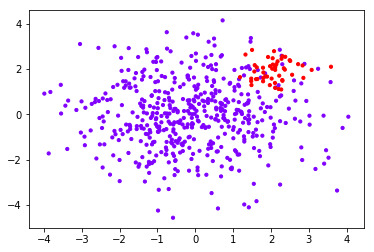

In [49]:
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类

In [50]:
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)

In [51]:
clf_proba.predict_proba(X).shape #生成的各类标签下的概率

(550, 2)

In [52]:
clf_proba.predict_proba(X).shape

(550, 2)

In [53]:
clf_proba.decision_function(X) 

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [54]:
clf_proba.decision_function(X).shape

(550,)

In [55]:
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,1.0,1
5,0.562775,0.437225,1.0,0
9,0.585284,0.414716,1.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [56]:
#首先来看看如何从混淆矩阵中获取FPR和Recall
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm

array([[4, 0],
       [2, 5]], dtype=int64)

In [57]:
#00/all true 0 1-特异度

In [58]:
#FPR #被我们预测错误的0占所有真正为0的样本的比例
cm[1,0]/cm[1,:].sum()

0.2857142857142857

In [59]:
#Recall
cm[0,0]/cm[0,:].sum()

1.0

In [60]:
#概率 clf_proba.predict_proba(X)[:,1] #我的类别1下面的概率

In [61]:
#阈值，每一个阈值都对应着一次循环，每一次循环，都要有一个混淆矩阵，要有一组假正率vsRecall

In [62]:
#np.lispance(概率最小值，概率最大值，55，endpoint=False) #不要取到最大值
#if i > 概率最大值, 返回1

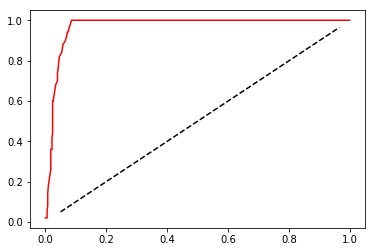

In [63]:
#开始绘图
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min(),clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False)

from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot

recall = []
FPR = []

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())

recall.sort()
FPR.sort()

plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()

In [64]:
from sklearn.metrics import roc_curve

In [65]:
FPR, recall, thresholds = roc_curve(y,clf_proba.decision_function(X), pos_label=1)

In [66]:
FPR.shape

(45,)

In [67]:
recall.shape

(45,)

In [68]:
thresholds.shape #此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负

(45,)

In [69]:
thresholds #decision_function

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [70]:
from sklearn.metrics import roc_auc_score as AUC

In [71]:
area = AUC(y,clf_proba.decision_function(X))

In [72]:
#min = 0
#max = 1

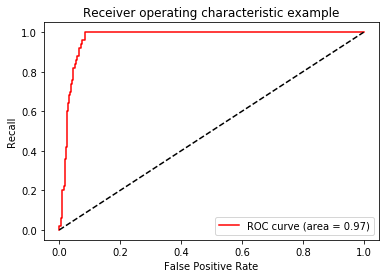

In [73]:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black',linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [74]:
max((recall - FPR).tolist())

0.914

In [75]:
#lits.index(最大值) #返回这个最大值在list中的索引

In [76]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))

In [77]:
maxindex #recall, FPR

43

In [78]:
thresholds[maxindex] #decision_function生成的置信度来说

-1.0860191749391461

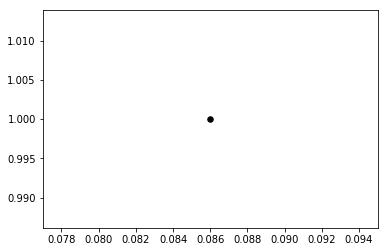

In [79]:
#我们可以在图像上来看看这个点在哪里
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

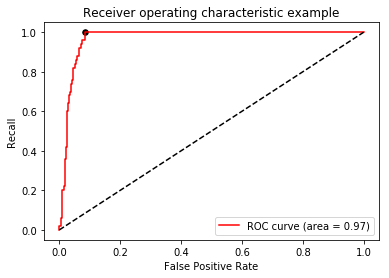

In [80]:
#把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [81]:
clf_proba.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.50312301,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -0.25015141,  0.75327442,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [84]:
clf_proba.support_vectors_.shape

(83, 2)

In [86]:
clf_proba.dual_coef_.shape

(1, 83)